In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

2.10.0


In [4]:
model = tf.keras.Sequential(layers=[
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

In [6]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 840us/step - loss: 2.2527 - accuracy: 0.7534
Epoch 2/5
1875/1875 [==============================] - 2s 833us/step - loss: 0.5788 - accuracy: 0.8493
Epoch 3/5
1875/1875 [==============================] - 2s 827us/step - loss: 0.4558 - accuracy: 0.8809
Epoch 4/5
1875/1875 [==============================] - 2s 828us/step - loss: 0.4159 - accuracy: 0.8911
Epoch 5/5
1875/1875 [==============================] - 2s 831us/step - loss: 0.3812 - accuracy: 0.9002


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\n테스트 정확도: ", test_acc)

313/313 - 0s - loss: 0.2895 - accuracy: 0.9434 - 275ms/epoch - 878us/step

테스트 정확도:  0.9434000253677368


313/313 [==============================] - 0s 564us/step
예측값: 7, 실제값: 7


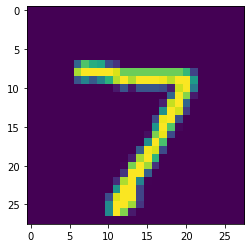

In [8]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(x_test)
pred = np.argmax(predictions[0])

print("예측값: {}, 실제값: {}".format(pred, y_test[0]))

plt.imshow(x_test[0])
plt.show()

In [9]:
history.history

{'loss': [2.2526795864105225,
  0.5787924528121948,
  0.45575061440467834,
  0.4158649742603302,
  0.38119757175445557],
 'accuracy': [0.7534499764442444,
  0.8493333458900452,
  0.8808666467666626,
  0.8911333084106445,
  0.9002000093460083]}

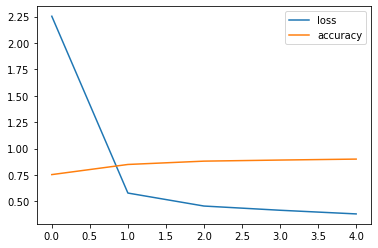

In [10]:
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])
plt.legend(["loss", "accuracy"])
plt.show()